# Cluster the data 

In [51]:
import scanpy as sc

In [52]:
#adata = sc.read("/storage/users/data/PANC/filtered_preprocessed_combined_adata.h5ad")
adata = sc.read("/storage/users/data/PANC/filtered_preprocessed_combined_adata.h5ad")
#adata = sc.read("/storage/users/data/PANC/cellcycle_adata.h5ad")
#adata = sc.read("/storage/users/sac43cg/res_Samantha_1/outs/h5as_files/adata_neu.h5ad")  # Replace with your data file

In [53]:
adata

AnnData object with n_obs × n_vars = 10730 × 36601
    obs: 'condition', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pct_cmo', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'CMO', 'gene_symbol', 'mito', 'ribo', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'condition_colors', 'hvg', 'log1p', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [54]:
adata.var_names

Index(['ENSG00000243485', 'ENSG00000237613', 'ENSG00000186092',
       'ENSG00000238009', 'ENSG00000239945', 'ENSG00000239906',
       'ENSG00000241860', 'ENSG00000241599', 'ENSG00000286448',
       'ENSG00000236601',
       ...
       'ENSG00000274175', 'ENSG00000275869', 'ENSG00000273554',
       'ENSG00000278782', 'ENSG00000277761', 'ENSG00000277836',
       'ENSG00000278633', 'ENSG00000276017', 'ENSG00000278817',
       'ENSG00000277196'],
      dtype='object', name='feature_id', length=36601)

In [36]:
adata.obs.condition

barcode
AAACCCAGTAGGCTCC-1         CTRL_1
AAACCCAGTCGCAACC-1         CTRL_1
AAACCCATCCACAAGT-1         CTRL_1
AAACGCTTCACTACGA-1         CTRL_1
AAACGCTTCAGCCTCT-1         CTRL_1
                         ...     
TTTACTGTCATTACTC-1    TGFb1_GEM_2
TTTCACAGTGATATAG-1    TGFb1_GEM_2
TTTCACATCGATGCAT-1    TGFb1_GEM_2
TTTCATGTCCCTCTAG-1    TGFb1_GEM_2
TTTGACTGTTCCGGTG-1    TGFb1_GEM_2
Name: condition, Length: 10730, dtype: category
Categories (8, object): ['CTRL_1', 'CTRL_2', 'CTRL_2D', 'GEM_2', 'TGFb1_1', 'TGFb1_2', 'TGFb1_GEM_1', 'TGFb1_GEM_2']

In [44]:
adata = adata[adata.obs['condition'] != 'CTRL_2D'].copy()

## Cluster the data (optional)

### Calculate clustering

In [45]:
# prepre clustering
sc.tl.pca(adata, svd_solver="arpack") # PCA
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40) # Neighborhood Graph Construction
#sc.tl.pca(adata)  # Perform PCA
#sc.pp.neighbors(adata)  # Compute neighborhood graph

In [46]:
# Leiden Clustering
sc.tl.leiden(adata)
# Store the Leiden clustering results in a column of the .obs attribute
adata.obs['leiden_combined'] = adata.obs['leiden'].astype(str)
sc.tl.umap(adata) # UMAP with Leiden Clustering and Leiden coloring

In [47]:
# Louvain Clustering
sc.tl.louvain(adata)  # Perform Louvain clustering
# Store the Louvain clustering results in a column of the .obs attribute
adata.obs['louvain_combined'] = adata.obs['louvain'].astype(str)
sc.tl.umap(adata) # Compute UMAP embedding

### Visualize clustering

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
!pwd

/home2/lumpi/Projects/single-cell_samantha/code/scripts


/home2/lumpi/miniconda3/envs/scanpy-env3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


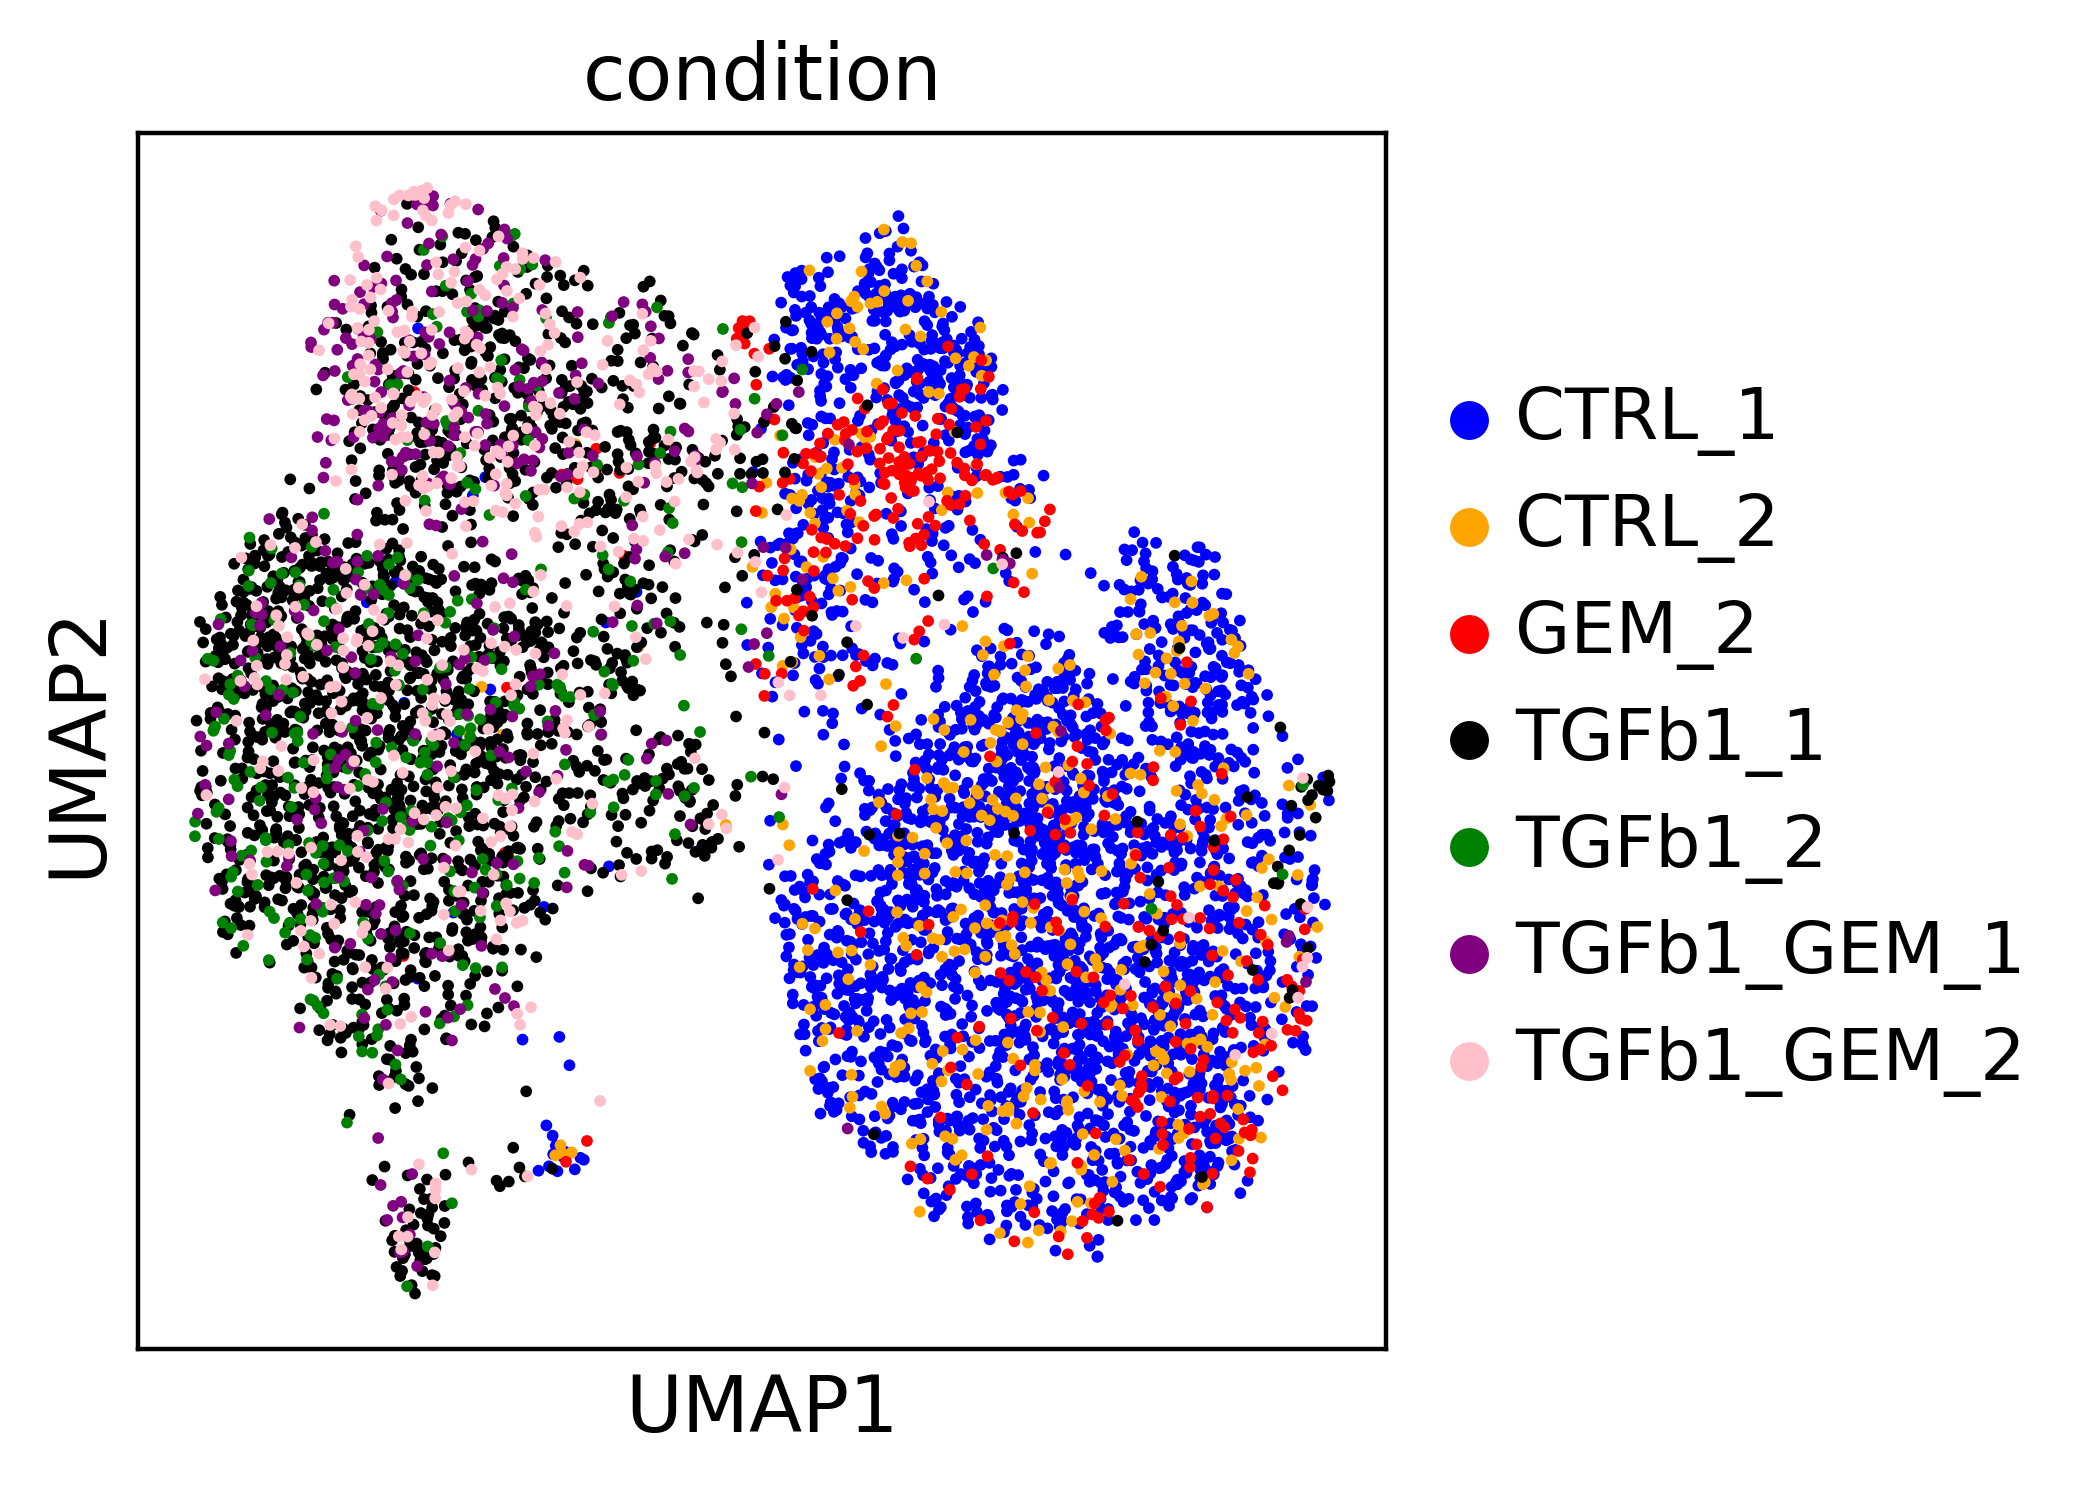

In [50]:
# Visualize Conditions

# Create a dictionary to map conditions to colors
condition_colors = {
 
  'CTRL_1': 'blue',
    'CTRL_2': 'orange',
    'TGFb1_2': 'green',
    'TGFb1_1': 'black',
    'TGFb1_GEM_1': 'purple',
    'TGFb1_GEM_2': 'pink',
    'GEM_2': 'red',
    'CTRL_2D': 'cyan'
}

# Plot the Louvain clustering with conditions colored
sc.settings.set_figure_params(dpi=200, dpi_save=300)
sc.pl.umap(adata, color=['condition'], legend_loc='right margin', palette=condition_colors, save="_UMAP_cond_preprocessing.png")

# Show the plot
plt.show()
              

/home2/lumpi/miniconda3/envs/scanpy-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


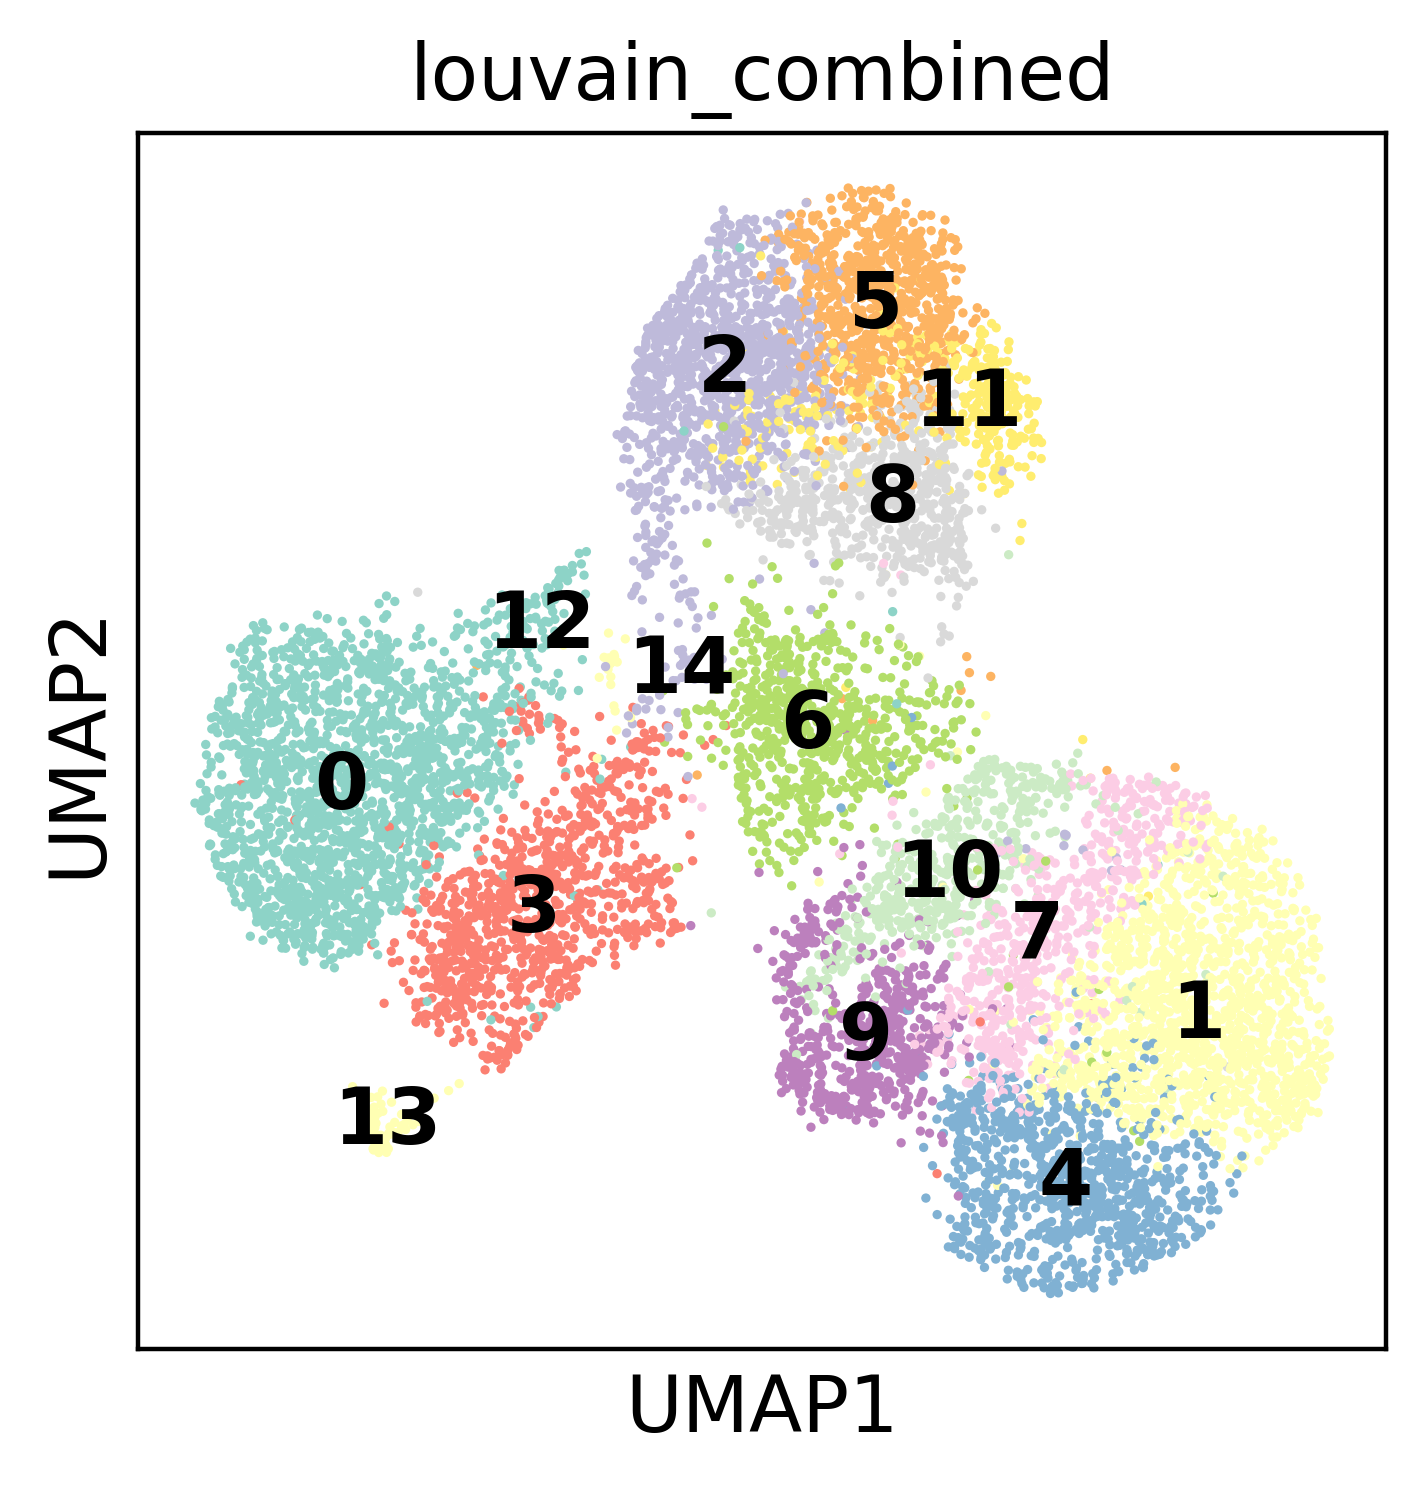

In [148]:
# Visualize Louvain clustering

import seaborn as sns

# Define a new color palette
louvain_clusters = adata.obs['louvain_combined']
n_clusters = len(louvain_clusters.unique())
color_palette = sns.color_palette('Set3', n_clusters)

# Plot the Louvain clustering with conditions colored
sc.pl.umap(adata, color='louvain_combined', palette=color_palette, legend_loc='on data', save="_UMAP_louvain_preprocessing.png")
#sc.pl.umap(combined_adata)

# Show the plot
#plt.show()

/home2/lumpi/miniconda3/envs/scanpy-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


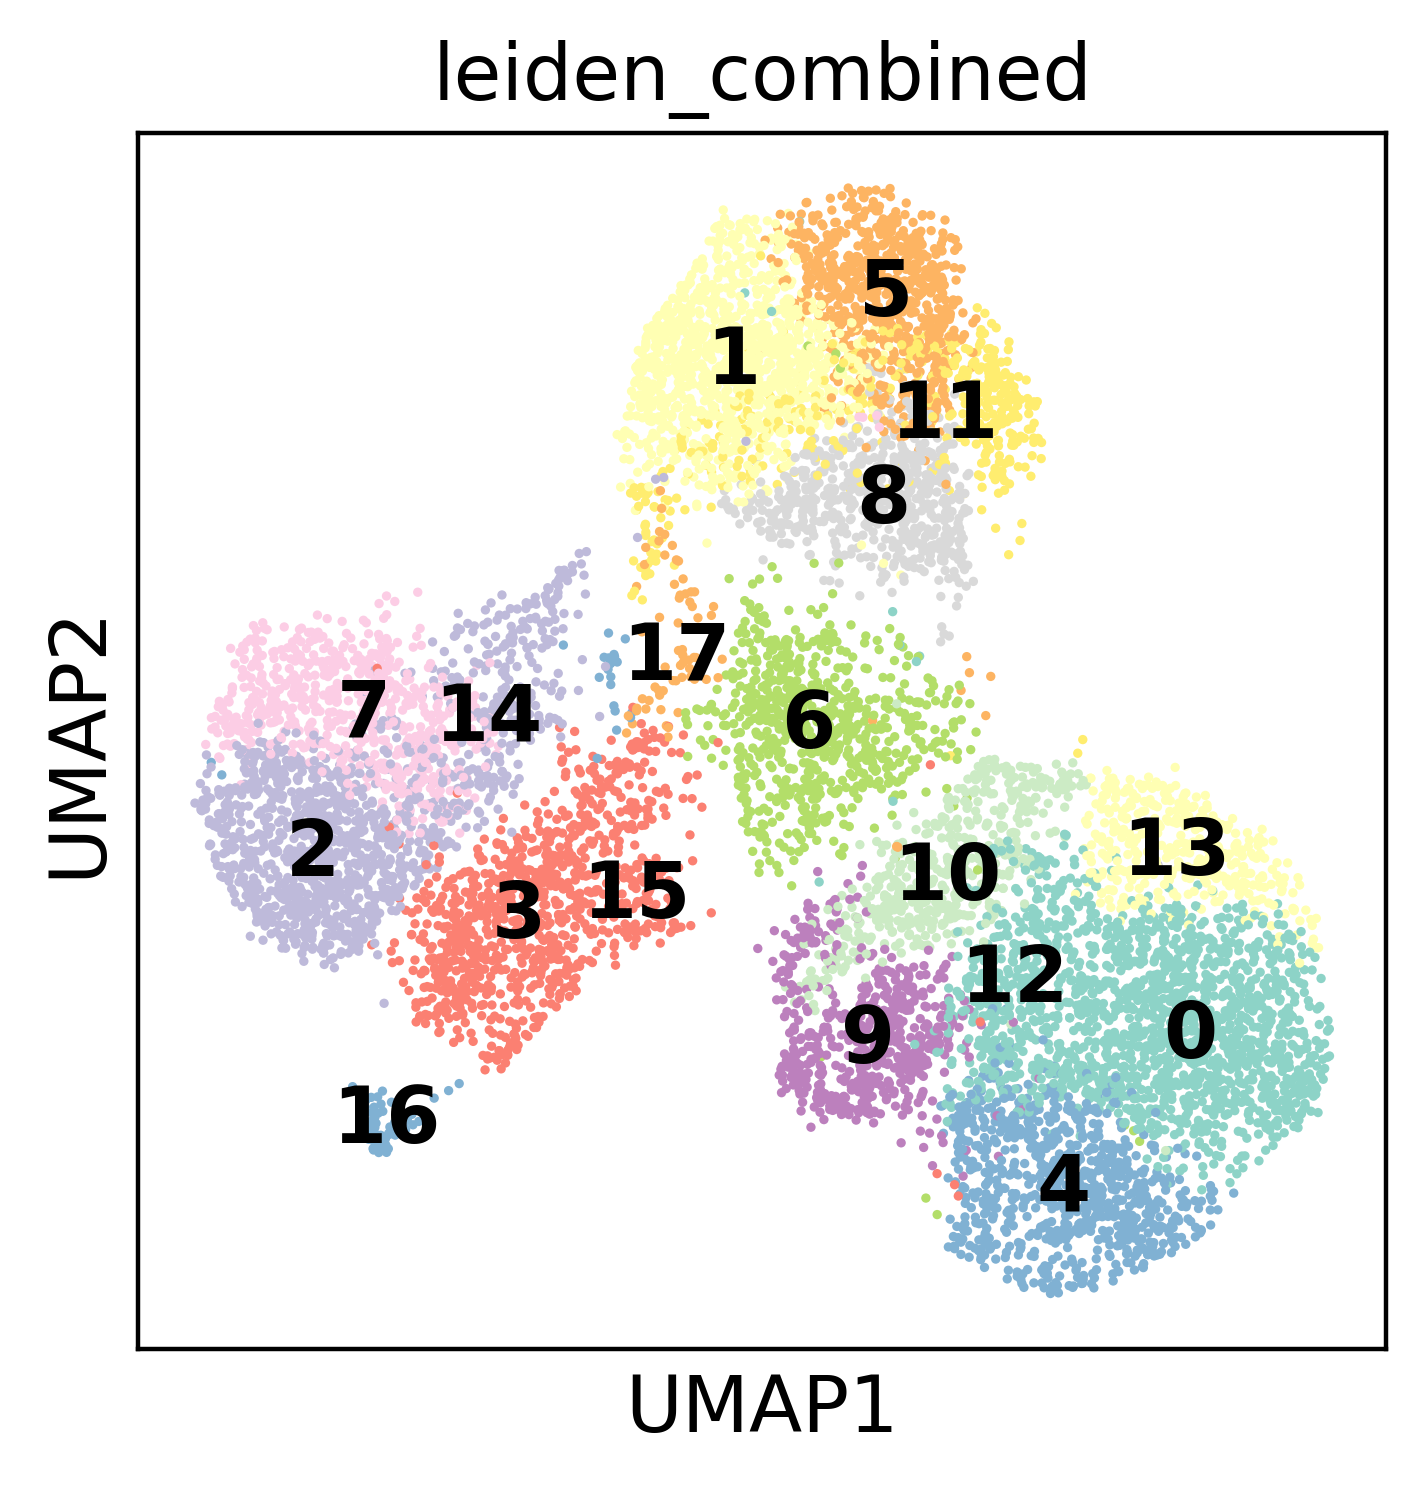

In [149]:
# Visualize Leiden clustering

import seaborn as sns

# Define a new color palette
leiden_clusters = adata.obs['leiden_combined']
n_clusters = len(leiden_clusters.unique())
color_palette = sns.color_palette('Set3', n_clusters)

# Plot the Louvain clustering with conditions colored
sc.pl.umap(adata, color='leiden_combined', palette=color_palette, legend_loc='on data', save="_UMAP_louvain_preprocessing.png")
#sc.pl.umap(combined_adata)

# Show the plot
#plt.show()

## Export

In [150]:
#adata.write('/storage/users/data/PANC/filtered_preprocessed_combined_adata.h5ad')

In [151]:
adata.write("/storage/users/data/PANC/clustered_adata.h5ad")

## Investigate selected Custers

/home2/lumpi/miniconda3/envs/scanpy-env/lib/python3.9/site-packages/scanpy/tools/_umap.py:166: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['umap'] = {'params': {'a': a, 'b': b}}
/home2/lumpi/miniconda3/envs/scanpy-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


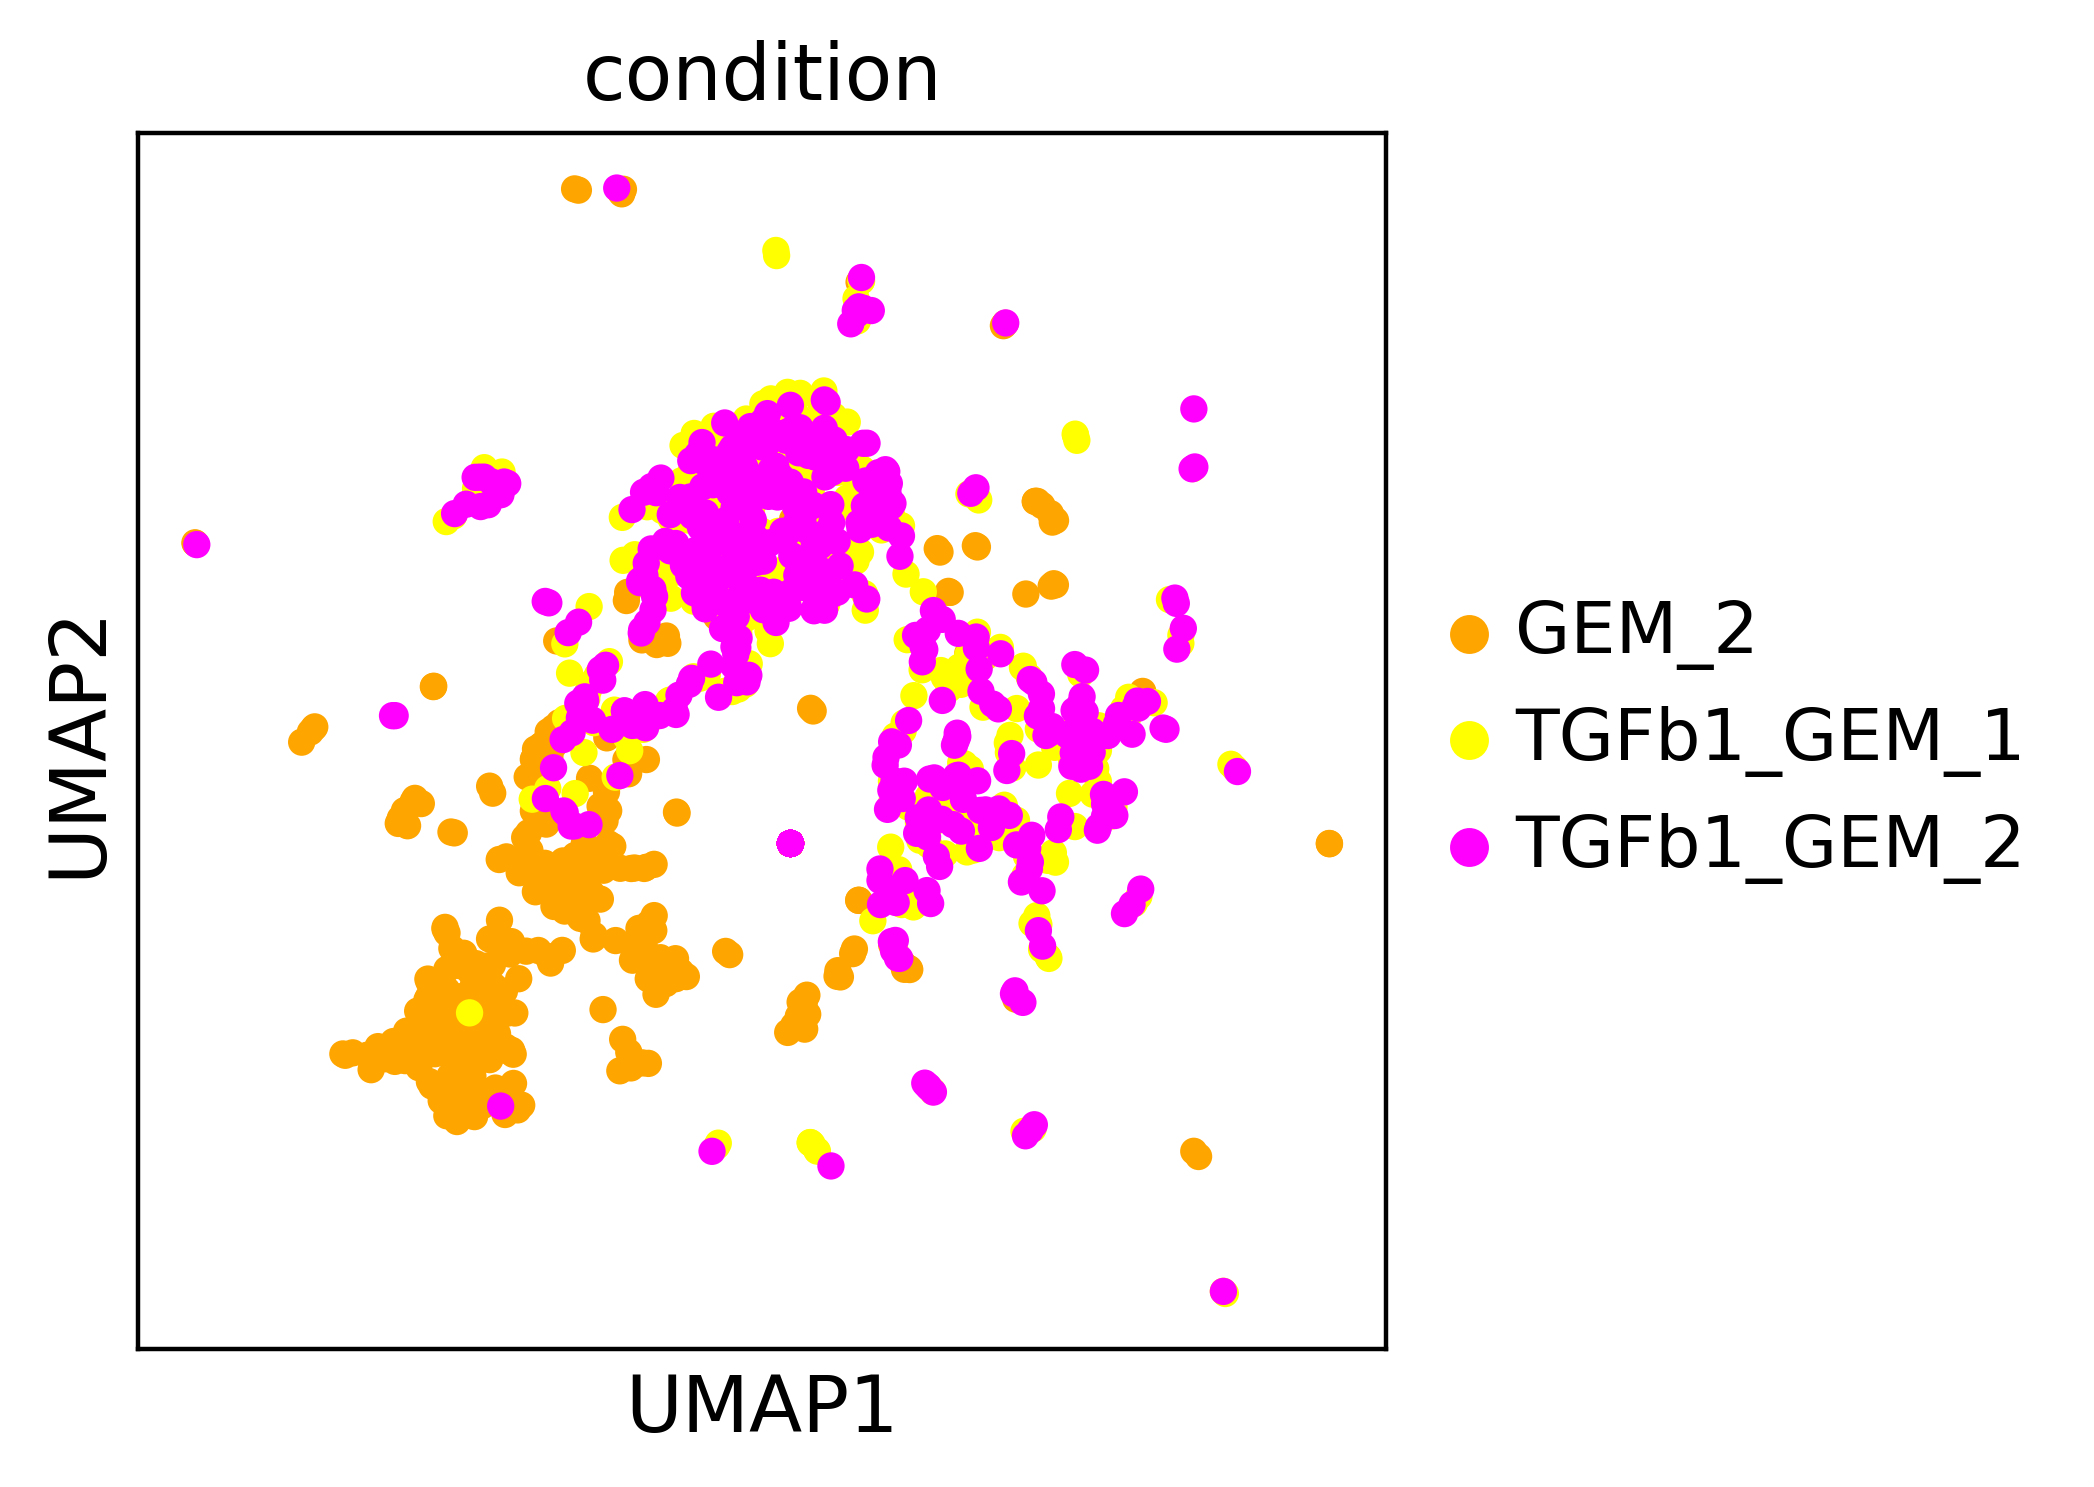

In [111]:
import scanpy as sc

# Annahme: adata enthält deine Daten und wurde bereits geladen/verarbeitet

# Liste der gewünschten Bedingungen
#selected_conditions = ["CTRL_1", 'CTRL_2',"CTRL_2D"]  # Füge hier die Bedingungen hinzu, die du anzeigen möchtest
#selected_conditions = ["CTRL_1", 'CTRL_2',"GEM_2"] 
#selected_conditions = ["CTRL_1", 'CTRL_2',"TGFb1_1",'TGFb1_2'] 
#selected_conditions = ["CTRL_1", 'CTRL_2',"TGFb1_GEM_1",'TGFb1_GEM_2'] 
#selected_conditions = ["TGFb1_1",'TGFb1_2',"TGFb1_GEM_1",'TGFb1_GEM_2'] 
#selected_conditions = ["TGFb1_1",'TGFb1_2',"GEM_2"]
selected_conditions = ["TGFb1_GEM_1",'TGFb1_GEM_2',"GEM_2"]


# Filtere die Daten nach den ausgewählten Bedingungen
adata_selected = adata[adata.obs["condition"].isin(selected_conditions)]

# Führe UMAP-Berechnungen durch
sc.tl.umap(adata_selected)

# Führe Leiden-Clustering durch
sc.tl.leiden(adata_selected)

sc.pl.umap(adata_selected, color=["condition"])

/home2/lumpi/miniconda3/envs/scanpy-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


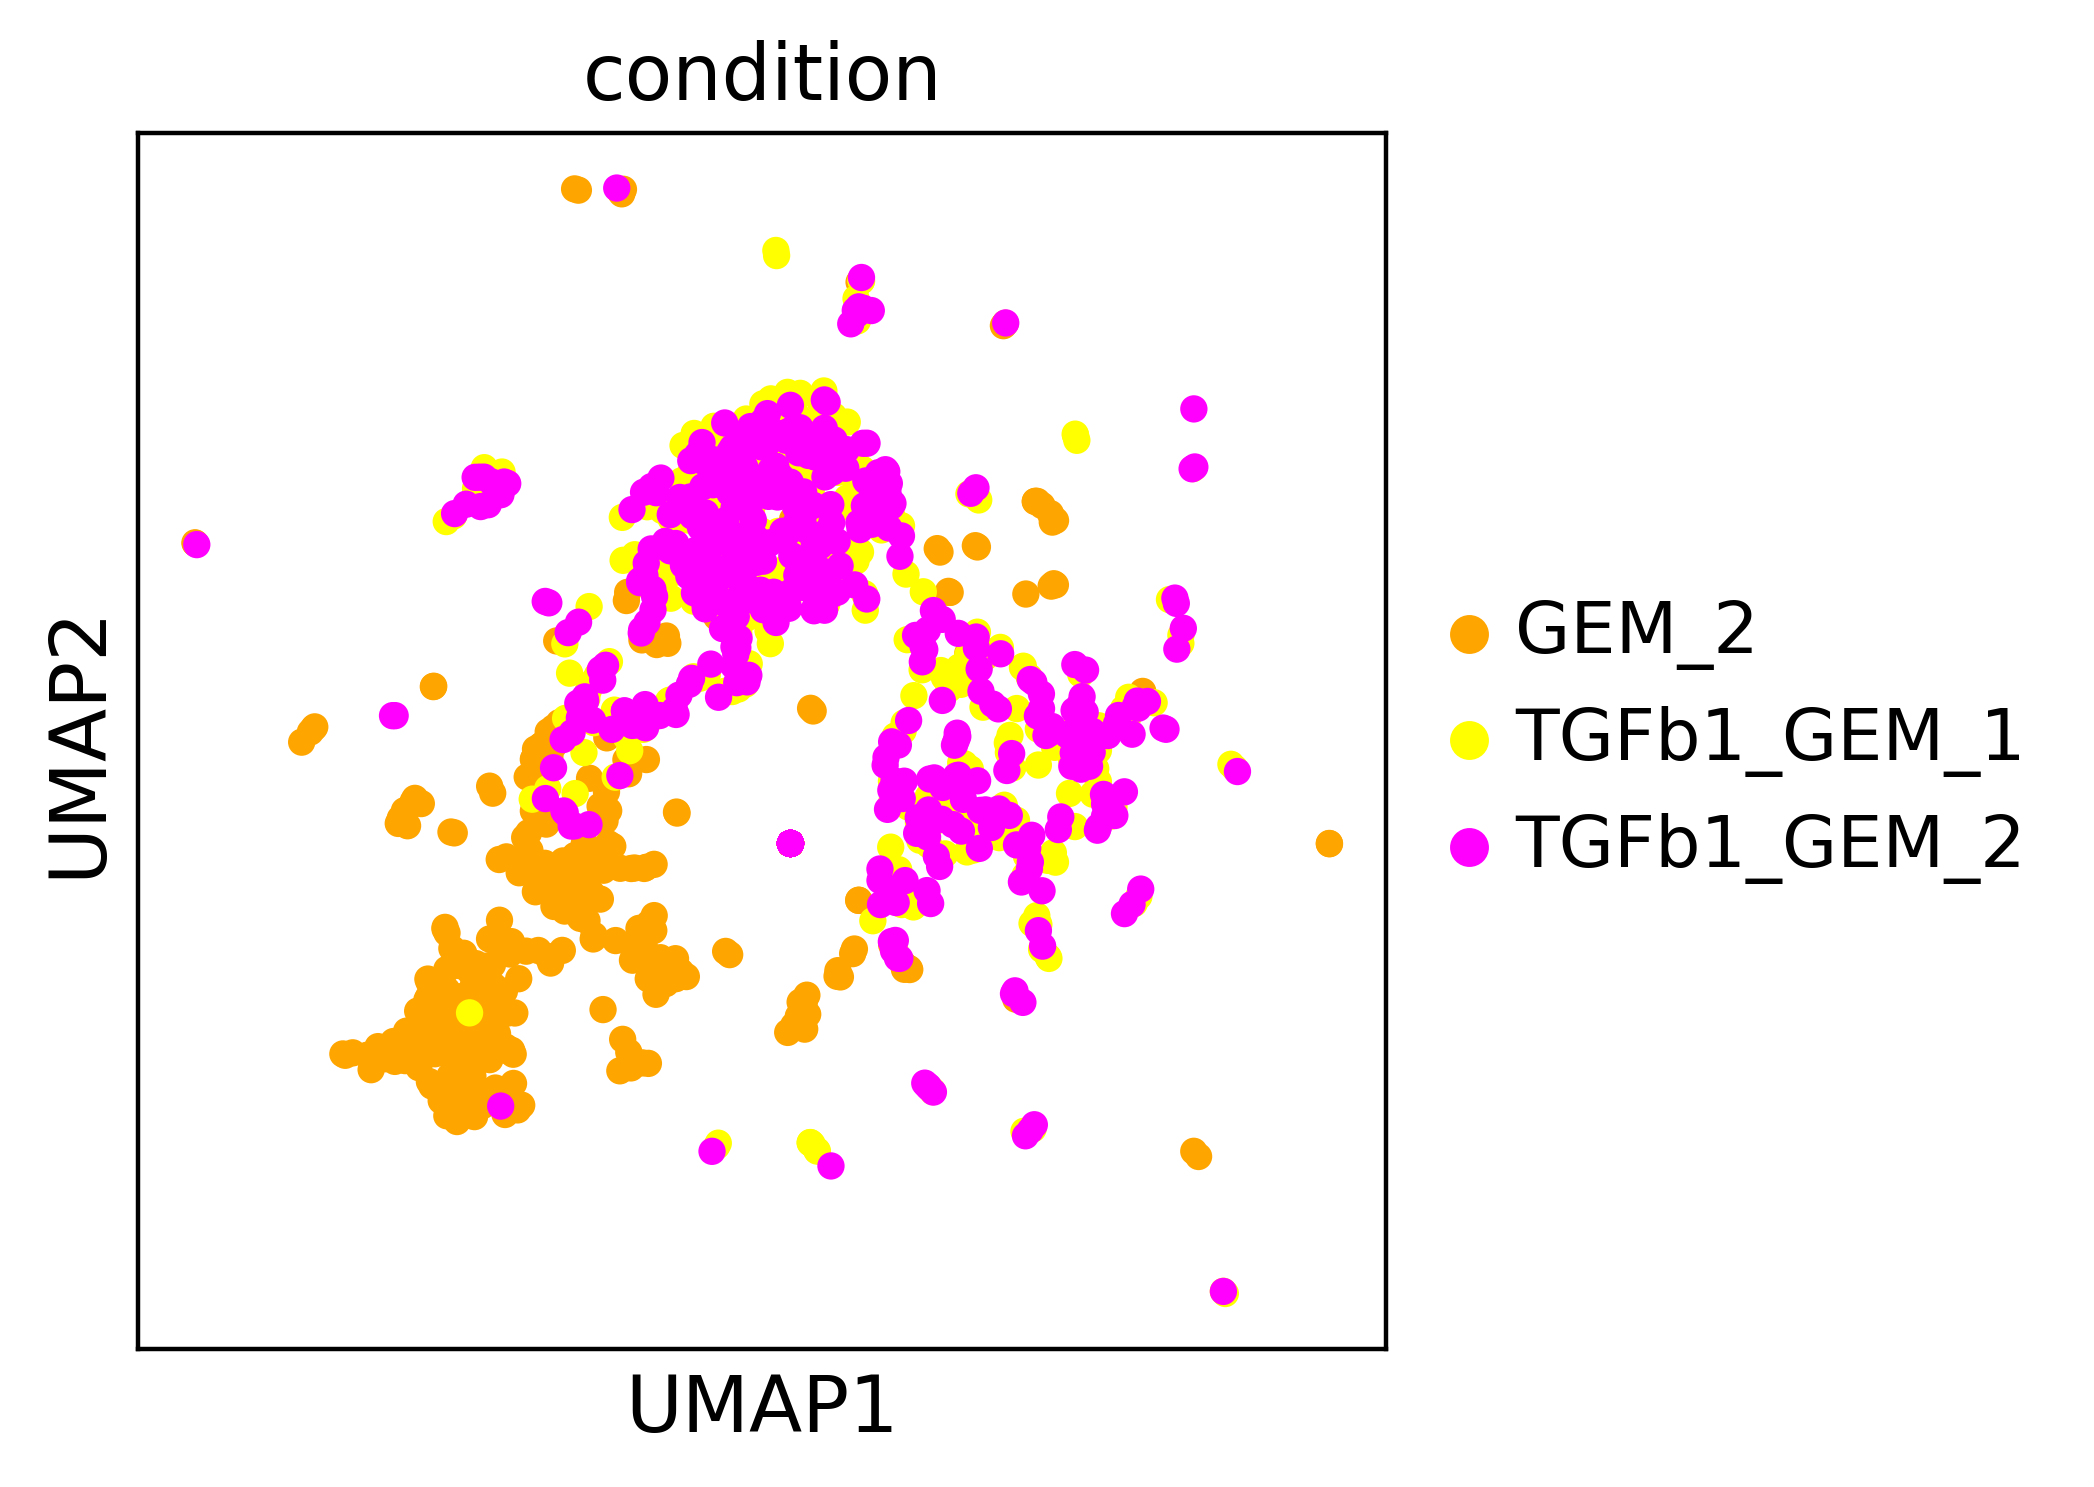

In [112]:
import os
import scanpy as sc
import matplotlib.pyplot as plt

# Speicherpfad für das Plot-Bild
#output_folder = '/storage/users/sac43cg/res_Samantha_1/outs/Figures'
output_folder = '/home2/lumpi/SingleCell_Samantha/scripts/figures'
output_filename = os.path.join(output_folder, 'TGFb1_2_GEM_1_2vsGEM_2_umap_plot_preprocessing.png')

# Überprüfen, ob der Ausgabeordner vorhanden ist, andernfalls erstellen
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Set the Scanpy settings to use the output folder
#sc.settings.figdir = output_folder

# Erstelle die UMAP-Plot und speichere ihn als Bild
#sc.pl.umap(adata_selected, color=["condition"], save=output_filename, dpi=600)
sc.pl.umap(adata_selected, color=["condition"], save="TGFvsGEM_ump.png")

# Speichern des Plots im angegebenen Ordner
#plt.savefig(output_filename, dpi=600)

In [113]:
!pwd

/storage/users/job37yv/shared/singel_cell_anaylsis/SingleCell_Samantha/scripts


## Get DEGs for each  Cluster

In [30]:
import scanpy as sc
import matplotlib.pyplot as plt

# Annahme: adata ist Ihr anndata-Objekt

# Berechnen von UMAP und Leiden-Clustering
sc.tl.umap(adata)
sc.tl.leiden(adata)

# Berechnen der differentiell exprimierten Gene für jedes Cluster
sc.tl.rank_genes_groups(adata, "leiden", method='t-test', key_added="rank_genes_leiden")

# Hier definieren Sie den gewünschten Cluster-Index, z.B. 0 für den ersten Cluster
cluster_index = 13

# Die differentiell exprimierten Gene für das ausgewählte Cluster abrufen
de_genes = adata.uns["rank_genes_leiden"]["names"][cluster_index]

# Drucken Sie die Liste der differentiell exprimierten Gene aus
print(f"DEGs for Cluster {cluster_index}: {de_genes}")

# Plot von UMAP mit Farbcodierung nach Leiden-Clustern und speichern
sc.pl.umap(adata, color=["leiden"], save="_preprocessing.png")

# Plot von differentiell exprimierten Genen für das ausgewählte Cluster
sc.pl.rank_genes_groups(adata, groupby="leiden", key="rank_genes_leiden", group=cluster_index, save=f"_cluster_{cluster_index}_DEGs.png")

# Zeigen Sie die Plots an
plt.show()


KeyError: 'base'